In [21]:
import pandas as pd
import pymc as pm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [29]:
np.random.seed(0)
# generate random data with 2 features
X = np.random.normal(size=(1000, 2))
# true gradient parameters
true_beta = np.array([2, -3])
# generate y with noise
y = X @ true_beta + np.random.normal(scale=1, size=1000)



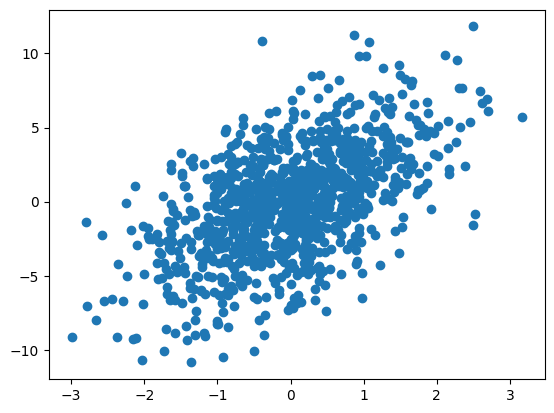

In [30]:
plt.scatter(X[:, 0], y)

In [31]:
# define priors

# Beta priors
# prior mean
mu_0 = np.zeros(2)
# prior covariance
Sigma_0 = np.eye(2)


# Noise parameters
# prior variance
alpha = 2.0
beta = 1.0

In [32]:
# first guess
beta_n = np.random.normal(size=2)
sigma2_n = 1

In [33]:
# Samples
N_samples = 10000

# Storage for samples
samples_beta = np.zeros((N_samples, 2))
samples_sigma2 = np.zeros(N_samples)

In [36]:
for i in range(N_samples):
    # Sample (beta | sigma2, y)
    Sigma_n_inv = np.linalg.inv(Sigma_0) + (1/sigma2_n) * X.T @ X
    Sigma_n = np.linalg.inv(Sigma_n_inv)
    mu_n = Sigma_n @ (np.linalg.inv(Sigma_0) @ mu_0 + (1/sigma2_n) * X.T @ y)
    beta_n = np.random.multivariate_normal(mu_n, Sigma_n)
    
    # Sample sigma2 | beta, y
    alpha_n = alpha + len(y) / 2
    beta_n_updated = beta + 0.5 * np.sum((y - X @ beta_n)**2) 
    sigma2_n = 1 / np.random.gamma(alpha_n, 1 / beta_n_updated)
    
    # Store samples
    samples_beta[i] = beta_n
    samples_sigma2[i] = sigma2_n
    
# Analysis of results
print("Mean of beta samples:", np.mean(samples_beta[5000:], axis=0))
print("Mean of sigma^2 samples:", np.mean(samples_sigma2[5000:]))



Mean of beta samples: [ 1.98915491 -3.02273348]
Mean of sigma^2 samples: 0.9140859784068373
